In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import main

## Vlidation of Hypothesis 7: There is no relationship between Gross Domestic Product (GDP) and Unemployment Rate

Through this hypothesis we aim to check whether there is a relationship between the Gross Domestic Product (GDP) and Unemployment Rate or not.

We test the following hypothesis:

**Null Hypothesis: There is NO relationship between Gross Domestic Product (GDP) and Unemployment Rate**

**Alternative Hypothesis: There is relationship between Gross Domestic Product (GDP) and Unemployment Rate**


In [2]:
gdp_df = pd.read_excel('./Data/unemploye rate by sex/GDP.xlsx')
gdp_df_tp = main.df_transit(gdp_df)
unemployment_df = pd.read_excel('./Data/unemploye rate by sex/unemployement rate by rate.xlsx') 

In [3]:
unemployment_df_tp_reset = main.process_unemployment_rate_df(unemployment_df)
gdp_df_tp_reset = gdp_df_tp.reset_index(drop=False)

In [4]:
merged_df = pd.merge(gdp_df_tp_reset, unemployment_df_tp_reset, on='index', how='outer')
merged_df = merged_df.dropna()


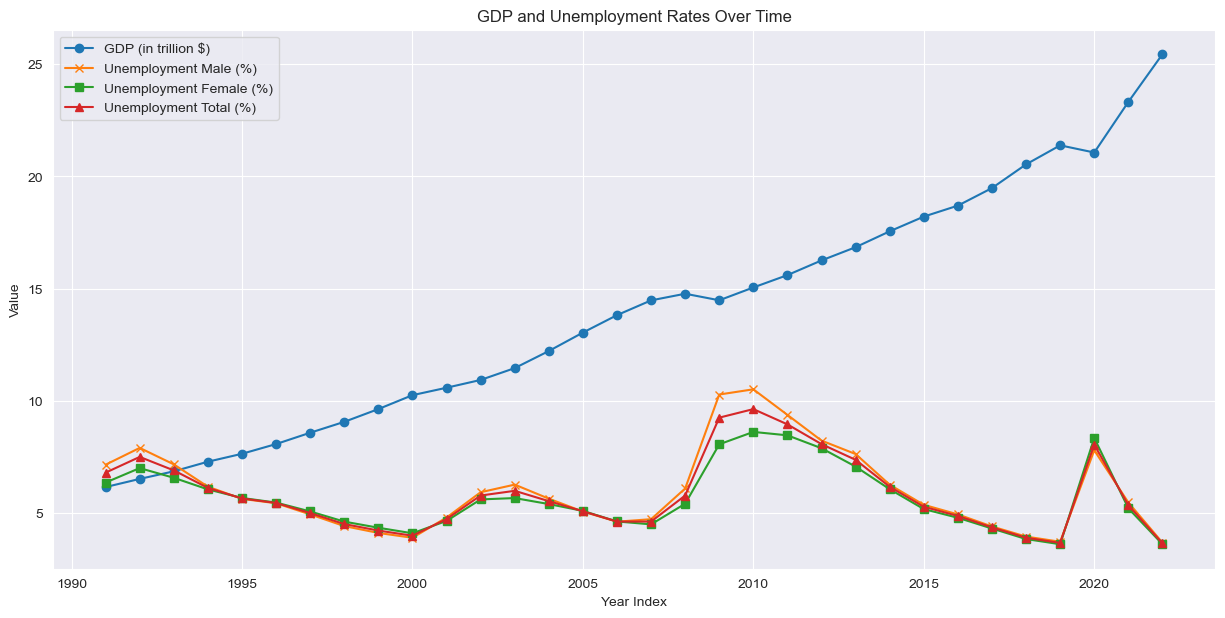

In [5]:
plt.figure(figsize=(15, 7))

plt.plot(merged_df['index'], merged_df['GDP'] / 1e12, label='GDP (in trillion $)', marker='o')

plt.plot(merged_df['index'], merged_df['male_rate'], label='Unemployment Male (%)', marker='x')
plt.plot(merged_df['index'], merged_df['female_rate'], label='Unemployment Female (%)', marker='s')
plt.plot(merged_df['index'], merged_df['total_rate'], label='Unemployment Total (%)', marker='^')

plt.title('GDP and Unemployment Rates Over Time')
plt.xlabel('Year Index')
plt.ylabel('Value')

plt.legend()
plt.grid(True)
plt.show()

### Observation
1.From the above plot, we observe that the unemployment rate is inversely related to the GDP. Notice, whenever the GDP increases and the unemployment rate decreases.

2.Around 2003 and during the Great Recession in 2008, there was a slight decrease in the GDP of United States and during both the times we notice that the unemployment rate increases.

3.Thus, we conclude that there is a relationship between the Gross Domestic Product (GDP) and the Unemployment Rate, and we reject the null hypothesis.

## Expansion on Hypothesis 7: 
### The relationship between Gross Domestic Product (GDP) growth and Unemployment Rate

Instead of looking directly at total GDP and the unemployment rate, it is easier to see the relationship between them by calculating the annual GDP growth.


In [6]:
gdp_df_tp_reset = main.calculate_GDP_Growth(gdp_df_tp_reset)
merged_df = pd.merge(gdp_df_tp_reset, unemployment_df_tp_reset, on='index', how='outer')
merged_df = merged_df.dropna()

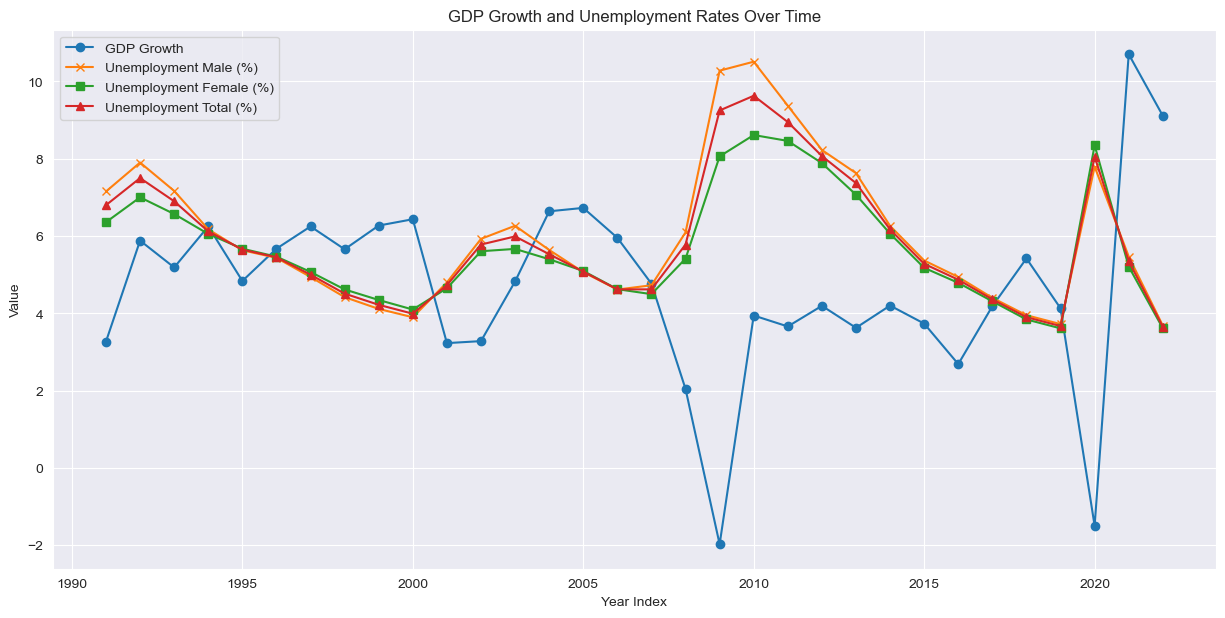

In [7]:
plt.figure(figsize=(15, 7))

plt.plot(merged_df['index'], merged_df['GDP_Growth'] , label='GDP Growth', marker='o')

plt.plot(merged_df['index'], merged_df['male_rate'], label='Unemployment Male (%)', marker='x')
plt.plot(merged_df['index'], merged_df['female_rate'], label='Unemployment Female (%)', marker='s')
plt.plot(merged_df['index'], merged_df['total_rate'], label='Unemployment Total (%)', marker='^')

plt.title('GDP Growth and Unemployment Rates Over Time')
plt.xlabel('Year Index')
plt.ylabel('Value')

plt.legend()
plt.grid(True)

plt.show()

### Observations
1. From the above graph we can easily see that unemployment rate is inversely proportional to GDP. Note that whenever GDP increases, the unemployment rate decreases.

2. The GDP of the United States declined slightly around 2003 and during the Great Recession of 2008, and we note that the unemployment rate increased during both of these periods.

3. During the Covid_19 around 2019, the rapid increase in unemployment was accompanied by a relatively large decrease in DGP.


## Expansion on Hypothesis 7 (Continue): There is no relationship between Gross Domestic Product (GDP) and Unemployment Rate of European Union
Through this hypothesis we aim to check whether there is a relationship between the European Union Gross Domestic Product (GDP) and Unemployment Rate or not. And similarly, I have calculated the annual GDP growth rate from the GDP data and compared the relationship between the GDP growth rate and the unemployment rate.

We test the following hypothesis:

**Null Hypothesis: There is NO relationship between Gross Domestic Product (GDP) and Unemployment Rate**

**Alternative Hypothesis: There is relationship between Gross Domestic Product (GDP) and Unemployment Rate**

In [8]:
eur_gdp_df = pd.read_excel('./Data/european data/European union GDP.xlsx' )
eur_gdp_df_tp = main.process_eur_gdp(eur_gdp_df)
eur_unemp_df = pd.read_excel('./Data/european data/ueropean union unemployment rate.xlsx' )
eur_unemp_df_tp = main.process_eur_unemp(eur_unemp_df)
euro_merged_df = pd.merge(eur_unemp_df_tp, eur_gdp_df_tp)

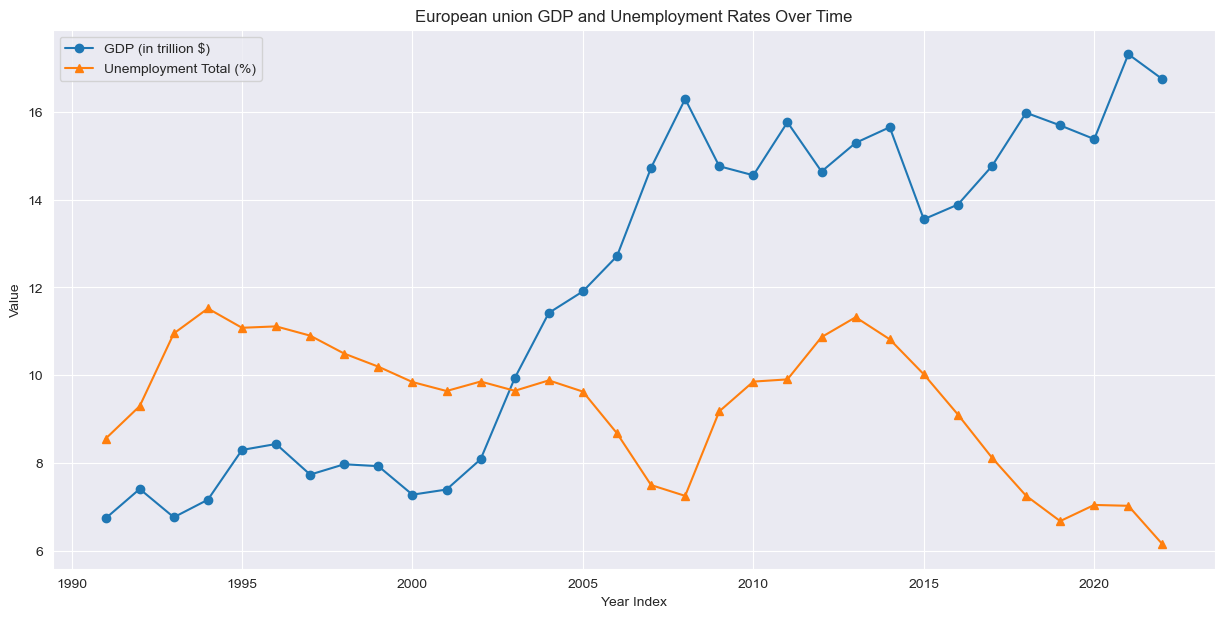

In [9]:
plt.figure(figsize=(15, 7))

plt.plot(euro_merged_df['Year'], euro_merged_df['GDP'] / 1e12, label='GDP (in trillion $)', marker='o')
plt.plot(euro_merged_df['Year'], euro_merged_df['Unemployment Rate'], label='Unemployment Total (%)', marker='^')
plt.title('European union GDP and Unemployment Rates Over Time')
plt.xlabel('Year Index')
plt.ylabel('Value')


plt.legend()
plt.grid(True)

plt.show()

In [10]:
euro_merged_df = main.calculate_EU_GDP_Growth(euro_merged_df)

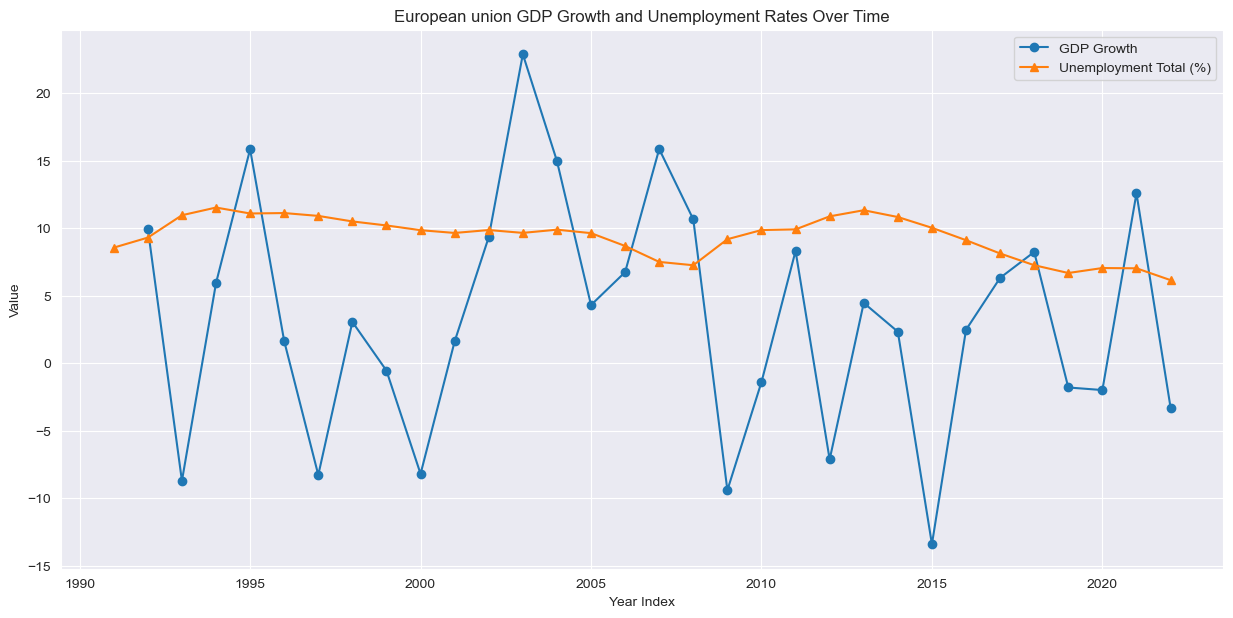

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(euro_merged_df['Year'], euro_merged_df['GDP_Growth'] , label='GDP Growth', marker='o')
plt.plot(euro_merged_df['Year'], euro_merged_df['Unemployment Rate'], label='Unemployment Total (%)', marker='^')
plt.title('European union GDP Growth and Unemployment Rates Over Time')
plt.xlabel('Year Index')
plt.ylabel('Value')

plt.legend()

plt.grid(True)

plt.show()

### Observations
1. The EU GPD data seems to be more volatile than the US GDP data.

2. Unlike the US data, it seems difficult to detect a clear relationship between GDP and unemployment in the EU data.

3. But probably because this is the EU GDP data as a whole, it is affected by each EU member state. For example, we can observe that in 2015, the Greek debt crisis had a huge impact on the GDP of the EU as a whole.


## Vlidation Hypothesis 8: There is no relationship between the President's Political Party and Unemployment Rate
Through this hypothesis we aim to check whether there is a relationship between the President's Political Party and Unemployment Rate.

We test the following hypothesis:

**Null Hypothesis: There is NO relationship between President's Political Party and the Unemployment Rate**

**Alternative Hypothesis: There is relationship between President's Political Party and the Unemployment Rate**

In [12]:
df_unemp = pd.read_excel('./Data/Political Party and Unemployment/College-labor-data.xlsx', sheet_name="unemployed", skiprows=10)
df_yearly_avg = main.read_and_process_yearly_unemp(df_unemp)

In [13]:
df_president = pd.read_csv('./Data/Political Party and Unemployment/US presidents.csv',
                          dtype={'Years (after inauguration)':'Int16'},
                          names=['Year', 'President', 'Party'],
                        
                          skiprows=1)
df_grouped = pd.merge(df_yearly_avg, df_president, how='inner')

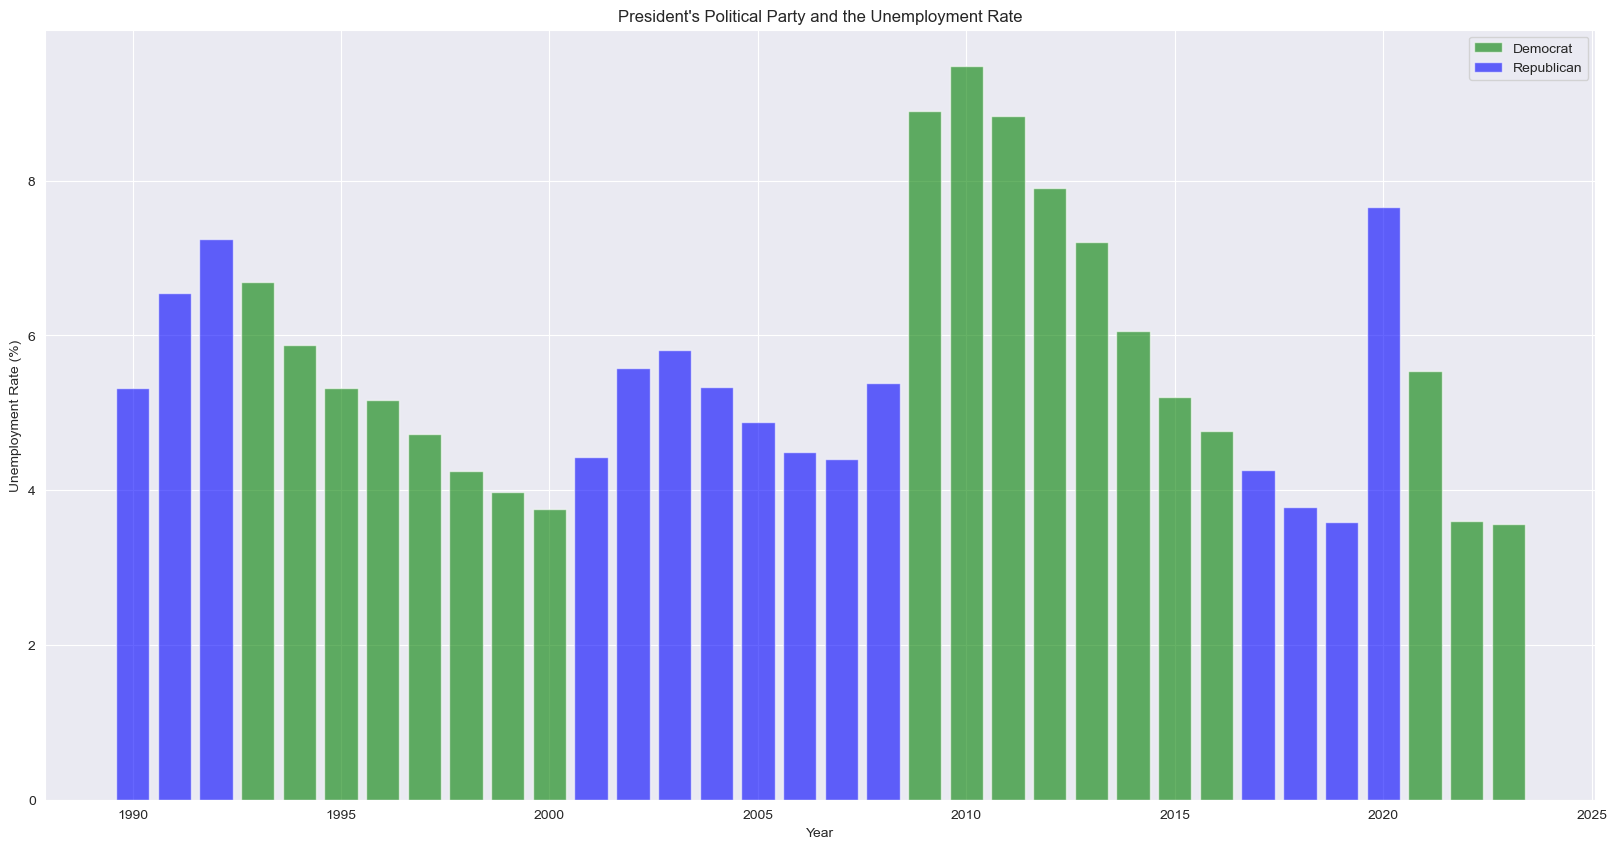

In [14]:
party_colors = {
    'Democrat': 'green',   
    'Republican': 'blue'   
}


plt.figure(figsize=(20,10))
for party, color in party_colors.items():
    data = df_grouped[df_grouped['Party'] == party]
    plt.bar(data['Year'], data['All workers'], label=party, color=color, alpha=0.6)

plt.title("President's Political Party and the Unemployment Rate")
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()


## Observation
Though there are many factors that contribute to the Unemployment rate in the country, from the above plot we notice that most of the times when Democratic Party's President was in power, the unemployment rate reduced. But, there are also some instances when the unemployment rate increased under Democratic Party like in the year 1961, 1980, and 2009.

While in the rule of Republican party, we observe that the unemployment rate trend is random.

Thus, we can say that there is no relationship between the President's Political Party and the Unemployment Rate in the United States and we **accept the null hypothesis.**

## Vlidation Hypothesis 9: Relation between Population and the Unemployment Rate
Null Hypothesis: There is NO relationship between the population and the Unemployment Rate

Alternative Hypothesis: There is relationship between the population and the Unemployment Rate

In [15]:
df_state_region = pd.read_csv('./Data/State Population/state_region_division.csv')
df_state_region = df_state_region.groupby('Region')['State']
for key, item in df_state_region:
    print('The states in', key, 'are:', list(item), '\n')

The states in Midwest are: ['Iowa', 'Illinois', 'Indiana', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'North Dakota', 'Nebraska', 'Ohio', 'South Dakota', 'Wisconsin'] 

The states in Northeast are: ['Connecticut', 'Massachusetts', 'Maine', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'] 

The states in South are: ['Alabama', 'Arkansas', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia'] 

The states in West are: ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'New Mexico', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'] 


In [16]:
df_state_population = pd.read_csv('./Data/State Population/statewise population.csv')
df_state_population = main.process_state_population(df_state_population)
df_state_population_long = pd.melt(df_state_population, id_vars=['Region'], var_name='Year', value_name='Population')
df_state_population_long['Population'] = df_state_population_long['Population'].astype(float)

In [17]:
df_state_unemployment = pd.read_excel('./Data/statae unemployment/Unemployment_Rate_by_State.xlsx')
df_state_unemployment['Region'] = df_state_unemployment['State'].apply(main.assign_division)
df_state_unemployment = df_state_unemployment.drop(['State'], axis = 1)
avg_unemployment_by_region = df_state_unemployment.groupby('Region').mean()
avg_unemployment_by_region = avg_unemployment_by_region.reset_index()
avg_unemployment_by_region_long = pd.melt(avg_unemployment_by_region, id_vars=['Region'], var_name='Year', value_name='Unemployment_Rate')
avg_unemployment_by_region_long['Unemployment_Rate'] = avg_unemployment_by_region_long['Unemployment_Rate'].astype(float)

In [18]:
df_state_population_long['Year'] = df_state_population_long['Year'].astype(str)
avg_unemployment_by_region_long['Year'] = avg_unemployment_by_region_long['Year'].astype(str)

df_state_population_long['Region'] = df_state_population_long['Region'].astype(str)
avg_unemployment_by_region_long['Region'] = avg_unemployment_by_region_long['Region'].astype(str)

df_state_unemp_pop_reg = pd.merge(avg_unemployment_by_region_long, df_state_population_long, 
                         on=['Region', 'Year'], 
                        how='inner')
df_state_unemp_pop_reg['Population'] = df_state_unemp_pop_reg['Population']/10**7


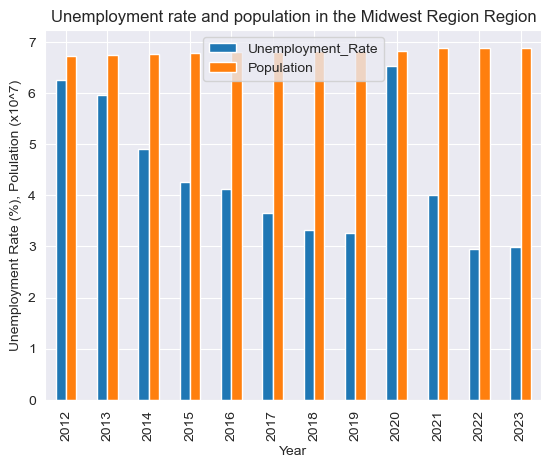

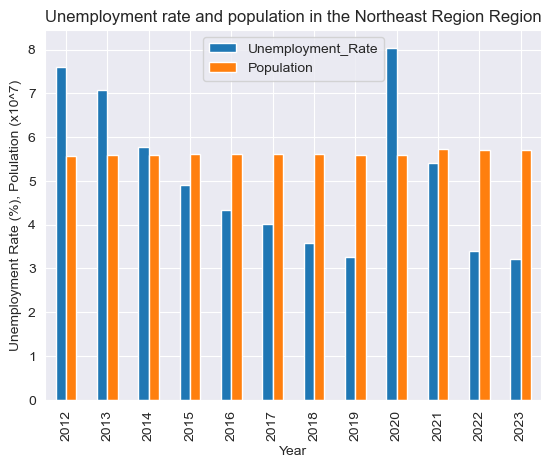

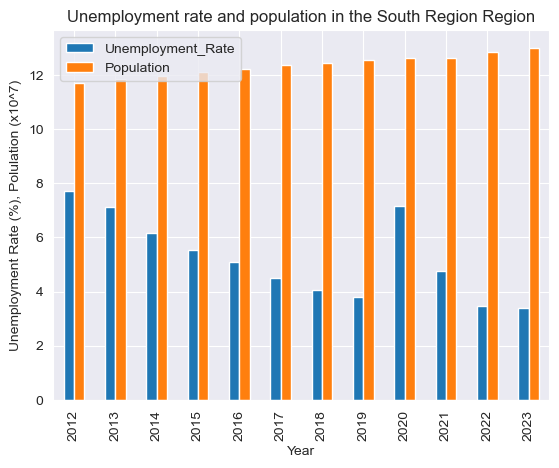

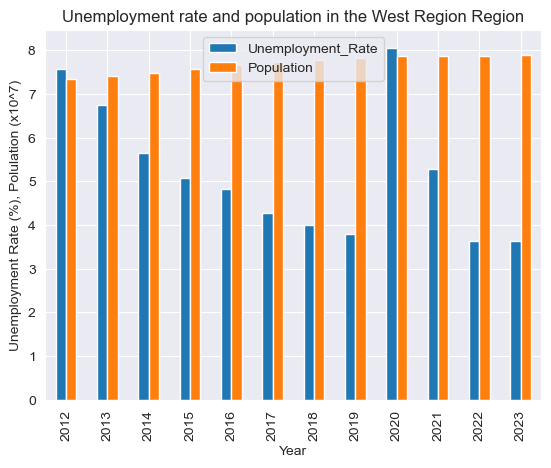

In [19]:
df_rate_pop = df_state_unemp_pop_reg.groupby(['Region','Year'])[['Unemployment_Rate','Population']].agg({'Unemployment_Rate':[np.mean], 'Population':[np.sum]}).reset_index()
df_rate_pop.columns = ['Region', 'Year', 'Unemployment_Rate', 'Population']

for region in df_rate_pop['Region'].unique():
    df_rate_pop[df_rate_pop['Region']==region].plot(x='Year', y=['Unemployment_Rate', 'Population'], kind='bar')
    plt.title('Unemployment rate and population in the '+region+' Region')
    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%), Polulation (x10^7)')
    plt.show()

### Observation:

The barplots above represents the mean of the unemployment rates of all states in a region and sum of the population (x10^7) for all the states in that region.

From the barplots above we notice that in Midwest and Northeast region there is not much significant change in population over the years (2011-2020) while for South and West region there is a notable increase in population in these years. But we notice that for all the regions the unemployment rate decreases from 2011 to 2019. 

In 2020, due to the Covid-19 pandemic there is a rise in the unemployment rate for all the regions in the United States.

## Expansion on Hypothesis 8：
But given the huge size of the population, annual changes in population size may be difficult to detect directly by looking at changes in the total population. So I first calculated the growth rate of the population and followed it to observe the relationship between population change and unemployment rate.


In [20]:
df_state_unemp_pop_reg = main.calculate_Population_Growth(df_state_unemp_pop_reg)

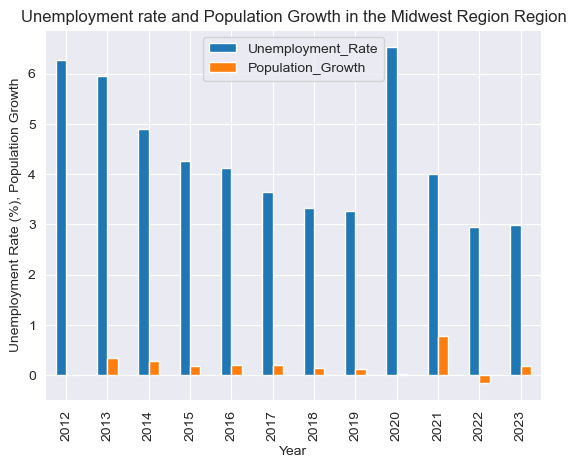

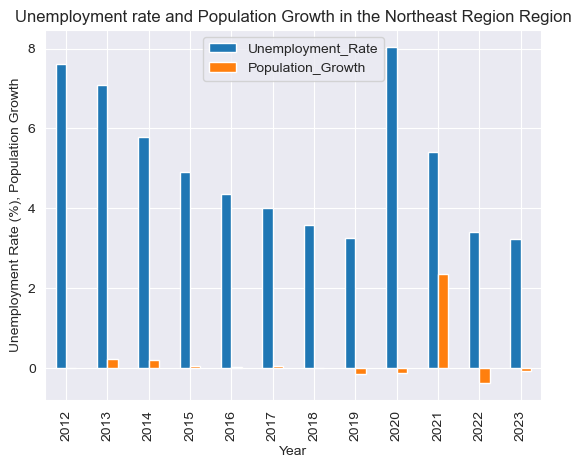

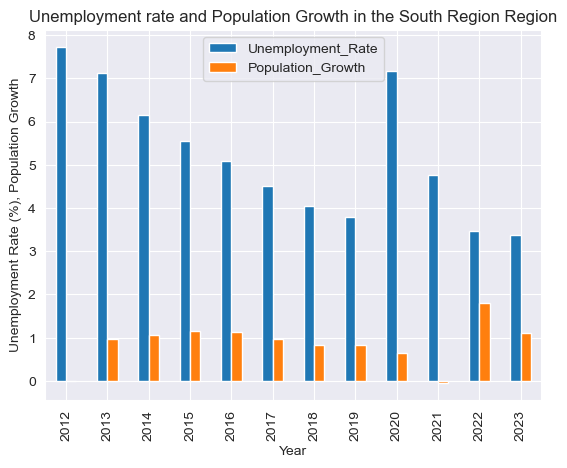

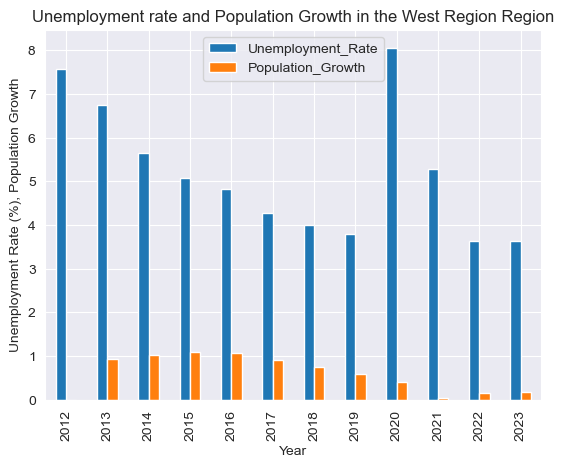

In [21]:
df_rate_pop = df_state_unemp_pop_reg.groupby(['Region','Year'])[['Unemployment_Rate','Population_Growth']].agg({'Unemployment_Rate':[np.mean], 'Population_Growth':[np.sum]}).reset_index()
df_rate_pop.columns = ['Region', 'Year', 'Unemployment_Rate', 'Population_Growth']

for region in df_rate_pop['Region'].unique():
    df_rate_pop[df_rate_pop['Region']==region].plot(x='Year', y=['Unemployment_Rate', 'Population_Growth'], kind='bar')
    plt.title('Unemployment rate and Population Growth in the '+region+' Region')
    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%), Population Growth')
    plt.show()

### Observation:
By looking at the Midwestern, Northeastern, and Southern regions of the United States, you can actually see that there are some connections between them.

The population growth rate is affected by the unemployment rate. When the unemployment rate increased rapidly during 2020, the population growth rate also witnessed an increase the following year.

The population growth rate appears to be positively related to the unemployment rate, but changes in population will respond more slowly than the unemployment rate.

Therefore, we **reject the null hypothesis** that there is a relationship between population and unemployment.

## Expansion on Hypothesis 9 (Continue): There is a relationship between population growth rate and Unemployment Rate of European Union

**Null Hypothesis: There is NO relationship between the population and the Unemployment Rate**

**Alternative Hypothesis: There is relationship between the population and the Unemployment Rate**

In [22]:
eur_population_df = pd.read_excel('./Data/european data/European union population.xlsx' )
eur_population_df = eur_population_df.drop(eur_population_df.columns[[1, 2, 3]], axis=1)
eur_population_df_tp = main.df_transit(eur_population_df)
eur_population_df_tp.columns = ['Year', 'Population']
eur_population_df_tp = eur_population_df_tp.reset_index(drop=True)

In [23]:
euro_merged_df = pd.merge(eur_unemp_df_tp, eur_population_df_tp)

<Figure size 1500x1000 with 0 Axes>

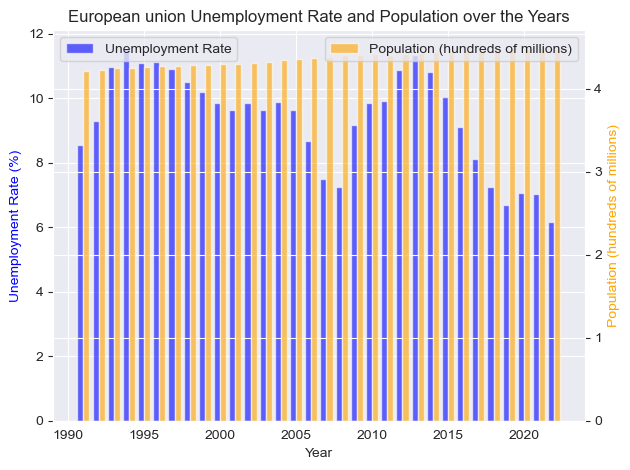

In [24]:
plt.figure(figsize=(15, 10))
fig, ax1 = plt.subplots()
bar_width = 0.4
ax1.bar(euro_merged_df["Year"] -  bar_width/2, euro_merged_df["Unemployment Rate"], width=bar_width, color='blue', alpha=0.6, label='Unemployment Rate')

ax2 = ax1.twinx()
ax2.bar(euro_merged_df["Year"] +  bar_width/2, euro_merged_df["Population"] / 1e8, width=bar_width, color='orange', alpha=0.6, label='Population (hundreds of millions)')

ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='b')
ax2.set_ylabel('Population (hundreds of millions)', color='orange')
ax1.set_title('European union Unemployment Rate and Population over the Years')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()

plt.show()




In [25]:
euro_merged_df = main.calculate_EU_population_growth(euro_merged_df)

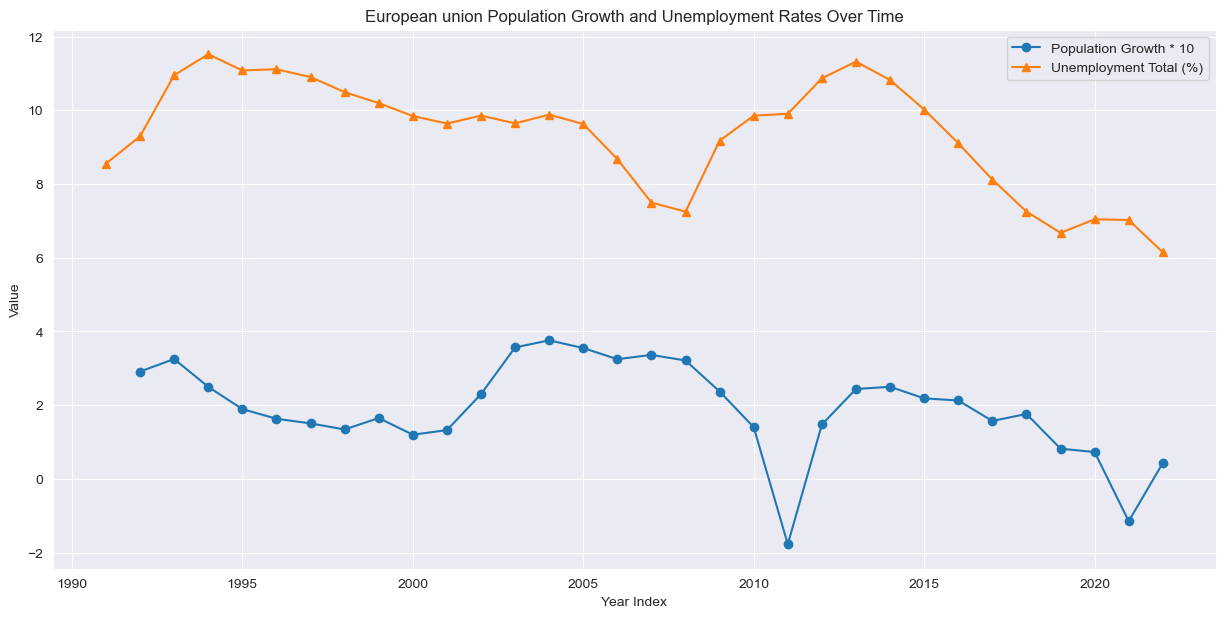

In [26]:
plt.figure(figsize=(15, 7))
plt.plot(euro_merged_df['Year'], euro_merged_df['Population_Growth'] * 10 , label='Population Growth * 10', marker='o')
plt.plot(euro_merged_df['Year'], euro_merged_df['Unemployment Rate'], label='Unemployment Total (%)', marker='^')

plt.title('European union Population Growth and Unemployment Rates Over Time')
plt.xlabel('Year Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

### Observation:

A look at the European data reveals that there is also some influential relationship between the population growth rate and the unemployment rate.

The relationship seems to be the same as that shown in the United States: there is a positive relationship between the unemployment rate and the population growth rate, but the population growth rate takes longer to reflect this than the unemployment rate.

Therefore, we **reject the null hypothesis** that there is a relationship between population and unemployment.

##  Hypothesis 10 
There is a relationship between minimum wage and unemployment rate
The purpose of this hypothesis is to test whether there is a relationship between the minimum wage and the unemployment rate for USA and European Union

We test the following hypothesis:

**Null Hypothesis: There is a relationship between the minimum wage and the unemployment rate.**

**Alternative hypothesis: There is no relationship between the minimum wage and the unemployment rate.**

In [27]:
min_wage_df = pd.read_excel('./Data/european data/min wage hourly.xlsx', skiprows=5 )
min_wage_df = min_wage_df.drop(min_wage_df.columns[[1]],  axis=1)
eur_list_df = pd.read_csv('./Data/european data/list-of-countries-in-the-european-union.csv' )


In [28]:
eur_list = [country for country in eur_list_df['country']]
print('The european union includes :')
for item in eur_list:
    print(item)

The european union includes :
Germany
France
Italy
Spain
Poland
Romania
Netherlands
Belgium
Sweden
Czech Republic
Greece
Portugal
Hungary
Austria
Bulgaria
Denmark
Slovakia
Finland
Ireland
Croatia
Lithuania
Slovenia
Latvia
Estonia
Cyprus
Luxembourg
Malta


In [29]:
USA_min_wage_df = main.get_USA_wage_data(min_wage_df)
df_yearly_avg['Year'] = df_yearly_avg['Year'].astype(int)
USA_min_wage_df['Year'] = USA_min_wage_df['Year'].astype(int)
USA_wage_merged_df = pd.merge( USA_min_wage_df, df_yearly_avg, on='Year', how='left')


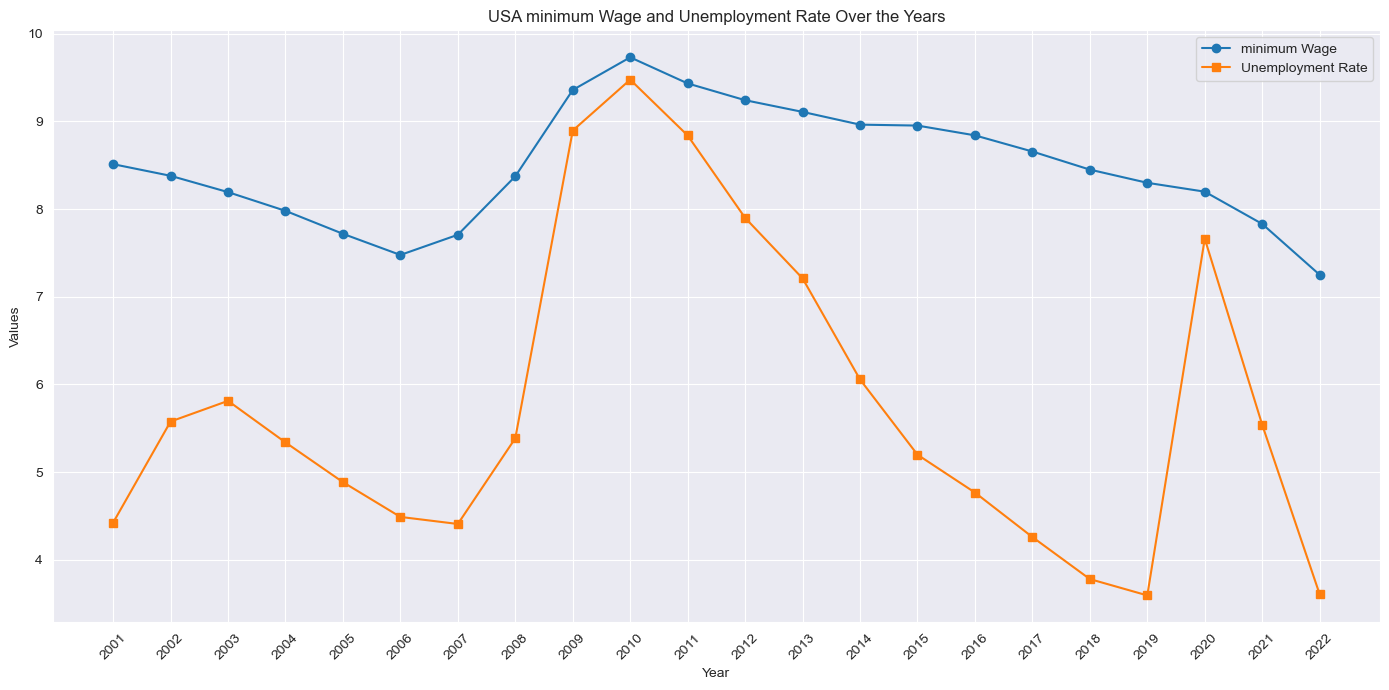

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(USA_wage_merged_df['Year'], USA_wage_merged_df['USA_wage'], marker='o', label='minimum Wage')
plt.plot(USA_wage_merged_df['Year'], USA_wage_merged_df['All workers'], marker='s', label='Unemployment Rate')

plt.title('USA minimum Wage and Unemployment Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(USA_wage_merged_df['Year'], rotation=45)  
plt.tight_layout()
plt.show()

## Observation
1. According to the chart, we can clearly find that there is a positive relationship between the minimum wage and the unemployment rate in the United States. However, it seems difficult to distinguish the order of causality between them.
2. It can be seen that the minimum wage in the United States reached its highest value in 2010, and has been in a downward trend since then.
3. As a result of the impact of Covid-19, the U.S. minimum wage has been declining more and more rapidly in recent years.

Thus, we can say that there is relationship between the minimum wage and the Unemployment Rate in the United States and we accept the null hypothesis.

In [31]:
euro_avg_wage = main.calculate_eur_wage_avg(min_wage_df)
eur_unemp_df_tp['Year'] = eur_unemp_df_tp['Year'].astype(int)
euro_avg_wage['Year'] = euro_avg_wage['Year'].astype(int)
euro_wage_merged_df = pd.merge(euro_avg_wage, eur_unemp_df_tp, on='Year', how='left')

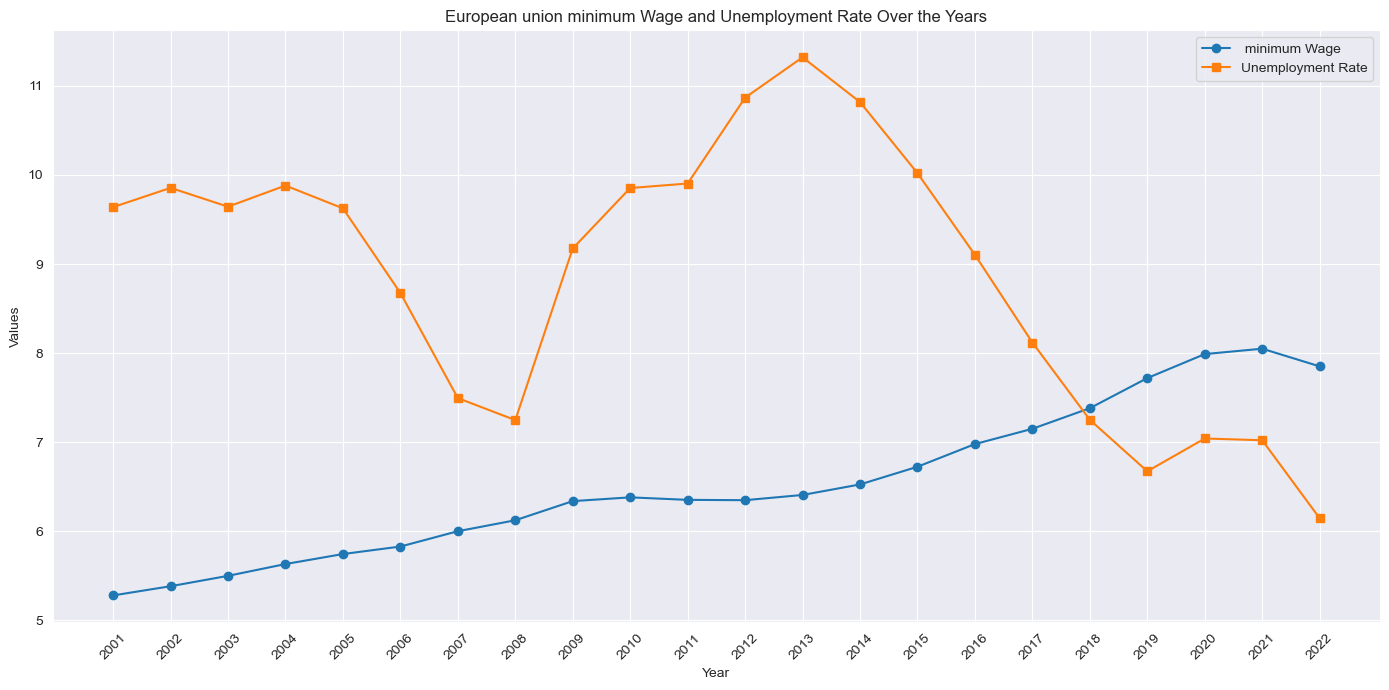

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(euro_wage_merged_df['Year'], euro_wage_merged_df['eur_wage'], marker='o', label=' minimum Wage')
plt.plot(euro_wage_merged_df['Year'], euro_wage_merged_df['Unemployment Rate'], marker='s', label='Unemployment Rate')

plt.title('European union minimum Wage and Unemployment Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(euro_wage_merged_df['Year'], rotation=45)  
plt.tight_layout() 
plt.show()

## Observation
1. According to the graph, we can see that the minimum wage in the European Union has been in a steady upward trend until recently, when it declined a little bit. However, the overall amount is still lower than that of the United States.
2. However, we can find that there is some influence between the minimum wage and the unemployment rate in the European Union, in the interval of 2004 to 2008 and 2013 to 2019, the rapid decline in the unemployment rate will lead to a rapid increase in the minimum wage.
3. During periods of rising unemployment, the minimum wage rises very slowly.

Thus, we can say that there is relationship between the minimum wage and the Unemployment Rate in the European Union and we accept the null hypothesis.